# Prerequisite

This project requires the [uv](https://docs.astral.sh/uv/) package manager to run. Make sure you are running this notebook with the generated virtual environment.

Install project dependencies:

In [52]:
!uv sync

Resolved 46 packages in 0.95ms
Audited 40 packages in 0.04ms


# Preparation

Imports.

In [53]:
from sympy import isprime
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import log

Set an upper limit for our searching and number of intervals on our plot. You may change these parameters.

In [55]:
SEARCH_MAX = 1000
INTERVAL_CNT = 10

Calculate size of each bin on histogram for future use.

In [56]:
bin_size = SEARCH_MAX / INTERVAL_CNT

Definition for twin primes.

In [57]:
def check(n: int) -> bool:
    return isprime(n) and isprime(n + 2)

Numerical integral for the [First Hardy-Littlewood Conjecture](https://en.wikipedia.org/wiki/First_Hardy%E2%80%93Littlewood_conjecture), which gives an estimation of distribution of twin primes:

$$
\pi_2(n)\sim C_2\int_2^n(\ln x)^{-2}\mathrm d t
$$

where $\pi_2(n)$ is the number of twin prime pairs less than $n$ and $C_2\approx1.320323632$ is constant.

To give an estimation of number of twin prime pairs on certain intervals, we can change the interval of the definite integral.

In [58]:
def hardy_littlewood(lower: float, upper: float) -> float:
    C2 = 1.320323632

    def f(x: float):
        return 1 / log(x) ** 2

    i, _err = quad(f, lower, upper)

    return C2 * i

# Searching for Twin Primes

We use brute force to search for twin prime pairs on specific interval.

In [59]:
print(f'Searching for twin primes under {SEARCH_MAX}')
found = [i for i in range(SEARCH_MAX) if check(i)]
print(f'Found {len(found)} twin prime pairs.')

Searching for twin primes under 1000
Found 35 twin prime pairs.


# Visualized Distribution

We could plot the twin prime pairs found in a histogram to visualize the distribution, using `matplotlib`.

In [60]:
def plot_hist():
    _ = plt.hist(found, bins=INTERVAL_CNT)
    _ = plt.title('Distrubution of Twin Primes')
    _ = plt.xlabel('The smaller twin')
    _ = plt.ylabel('Count')

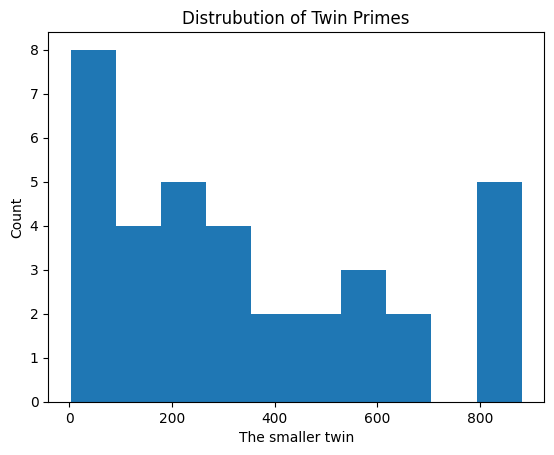

In [61]:
plot_hist()

# Compare w/ Hardy-Littlewood Conjecture

For each interval on the histogram, we could estimate the number of twin prime pairs with first Hardy-Littlewood Conjecture, and plot the estimated value in a line chart to see if it is consistent with the actual case.

Note that the integral doesn't always converge for a lower bound less than $2$ , so we use a starting point of $2$ instead of $0$ for the first interval.

In [ ]:
def plot_estimate():
    plot_hist()

    x = [i * bin_size for i in range(INTERVAL_CNT)]

    def f(n: float) -> float:
        return hardy_littlewood(max(2, n), n + bin_size)

    y = [f(i) for i in x]

    _ = plt.plot(x, y)

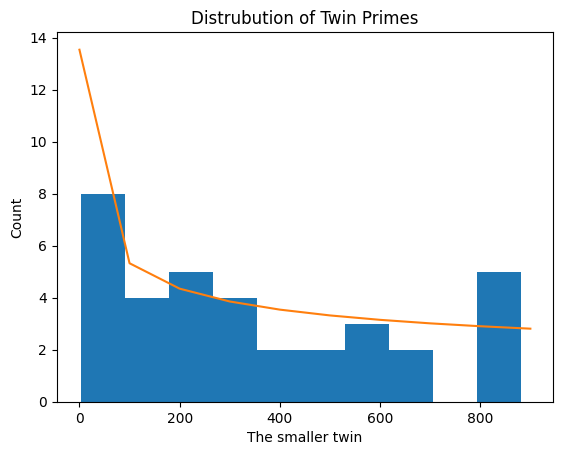

In [63]:
plot_estimate()